In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
transaction_data= pd.read_csv('transaction_data.csv')
behav_data= pd.read_csv('purchase_behaviour.csv')

In [113]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [114]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')


In [115]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [116]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [117]:
transaction_data = transaction_data.sort_values(by="TOT_SALES", ascending=False)
transaction_data


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
246126,2019-02-23,99,99370,98294,35,Woolworths Mild Salsa 300g,1,1.5
24919,2019-02-12,266,266127,263961,35,Woolworths Mild Salsa 300g,1,1.5
163881,2018-07-16,169,169136,171186,35,Woolworths Mild Salsa 300g,1,1.5
24897,2018-11-25,265,265249,263591,76,Woolworths Medium Salsa 300g,1,1.5


In [118]:
transaction_data.DATE.nunique()

364

In [119]:
full_dates = pd.date_range(start=transaction_data['DATE'].min(), end=transaction_data['DATE'].max())
full_dates

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [120]:
missing_dates = full_dates.difference(transaction_data['DATE'])

missing_dates

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

In [121]:
print(transaction_data['PROD_NAME'].nunique)

<bound method IndexOpsMixin.nunique of 69762           Dorito Corn Chp     Supreme 380g
69763           Dorito Corn Chp     Supreme 380g
55558     Smiths Crnkle Chip  Orgnl Big Bag 380g
69496     Smiths Crnkle Chip  Orgnl Big Bag 380g
150683    Smiths Crnkle Chip  Orgnl Big Bag 380g
                           ...                  
246126            Woolworths Mild     Salsa 300g
24919             Woolworths Mild     Salsa 300g
163881            Woolworths Mild     Salsa 300g
24897             Woolworths Medium   Salsa 300g
65915             Woolworths Mild     Salsa 300g
Name: PROD_NAME, Length: 264836, dtype: object>


In [122]:
transaction_data['PROD_NAME'].value_counts

<bound method IndexOpsMixin.value_counts of 69762           Dorito Corn Chp     Supreme 380g
69763           Dorito Corn Chp     Supreme 380g
55558     Smiths Crnkle Chip  Orgnl Big Bag 380g
69496     Smiths Crnkle Chip  Orgnl Big Bag 380g
150683    Smiths Crnkle Chip  Orgnl Big Bag 380g
                           ...                  
246126            Woolworths Mild     Salsa 300g
24919             Woolworths Mild     Salsa 300g
163881            Woolworths Mild     Salsa 300g
24897             Woolworths Medium   Salsa 300g
65915             Woolworths Mild     Salsa 300g
Name: PROD_NAME, Length: 264836, dtype: object>

In [123]:
transaction_data.dtypes


DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [124]:
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].astype("string")


In [125]:
transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME         string[python]
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [126]:
# Remove leading/trailing spaces
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(lambda x: ' '.join(x.split()))

# Stripping any extra spaces at the start and end
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.strip()




In [127]:
transaction_data['PROD_NAME'].value_counts()

PROD_NAME
Kettle Mozzarella Basil & Pesto 175g        3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps Ched & Chives 165g          3268
Cobs Popd Sea Salt Chips 110g               3265
                                            ... 
RRD Pc Sea Salt 165g                        1431
Woolworths Medium Salsa 300g                1430
NCC Sour Cream & Garden Chives 175g         1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut Original 175g                1410
Name: count, Length: 114, dtype: int64

In [128]:
transaction_data['brand_name'] = transaction_data['PROD_NAME'].str.split(' ').str[0]

In [129]:

transaction_data['Packet Size'] = transaction_data['PROD_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_19636\4040804470.py:1: SyntaxWarning: invalid escape sequence '\d'
  transaction_data['Packet Size'] = transaction_data['PROD_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [130]:
transaction_data['brand_name'].unique()


array(['Dorito', 'Smiths', 'Cheezels', 'Doritos', 'Kettle', 'Old',
       'Twisties', 'Tostitos', 'Tyrrells', 'Cobs', 'Infuzions', 'Infzns',
       'Pringles', 'Grain', 'Thins', 'Cheetos', 'GrnWves', 'RRD',
       'Natural', 'NCC', 'Red', 'Smith', 'Burger', 'CCs', 'WW', 'French',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [131]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
brand_name        0
Packet Size       0
dtype: int64

In [132]:
df_merged = pd.merge(transaction_data, behav_data, how = 'right', on = 'LYLTY_CARD_NBR')
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,brand_name,Packet Size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,Grain,210,YOUNG FAMILIES,Mainstream
264832,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,Kettle,150,YOUNG FAMILIES,Premium
264833,2018-10-27,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,Old,300,OLDER FAMILIES,Budget
264834,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,Tyrrells,165,OLDER FAMILIES,Budget


In [133]:

df_merged = df_merged.dropna()





In [134]:
df_merged.sort_values(by='Packet Size', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,brand_name,Packet Size,LIFESTAGE,PREMIUM_CUSTOMER
126808,2019-04-01,125,125288,129444,4,Dorito Corn Chp Supreme 380g,2,13.0,Dorito,380,OLDER SINGLES/COUPLES,Premium
126764,2018-12-02,125,125276,129397,4,Dorito Corn Chp Supreme 380g,2,13.0,Dorito,380,OLDER SINGLES/COUPLES,Premium
126775,2018-10-12,125,125278,129407,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,Smiths,380,RETIREES,Mainstream
264751,2018-12-26,272,272366,270170,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,Smiths,380,OLDER SINGLES/COUPLES,Budget
182076,2019-03-27,183,183176,185854,4,Dorito Corn Chp Supreme 380g,2,13.0,Dorito,380,OLDER FAMILIES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
121361,2019-03-12,120,120345,123863,38,Infuzions Mango Chutny Papadums 70g,1,2.4,Infuzions,70,RETIREES,Budget
132900,2018-10-25,131,131306,135641,38,Infuzions Mango Chutny Papadums 70g,2,4.8,Infuzions,70,RETIREES,Premium
132916,2019-06-27,131,131321,135658,38,Infuzions Mango Chutny Papadums 70g,1,2.4,Infuzions,70,RETIREES,Mainstream
121286,2018-12-30,120,120262,123785,38,Infuzions Mango Chutny Papadums 70g,1,2.4,Infuzions,70,RETIREES,Mainstream


In [135]:
df_merged.drop([69762, 69763], axis = 0, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19636\3871820233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values, palette='viridis')
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

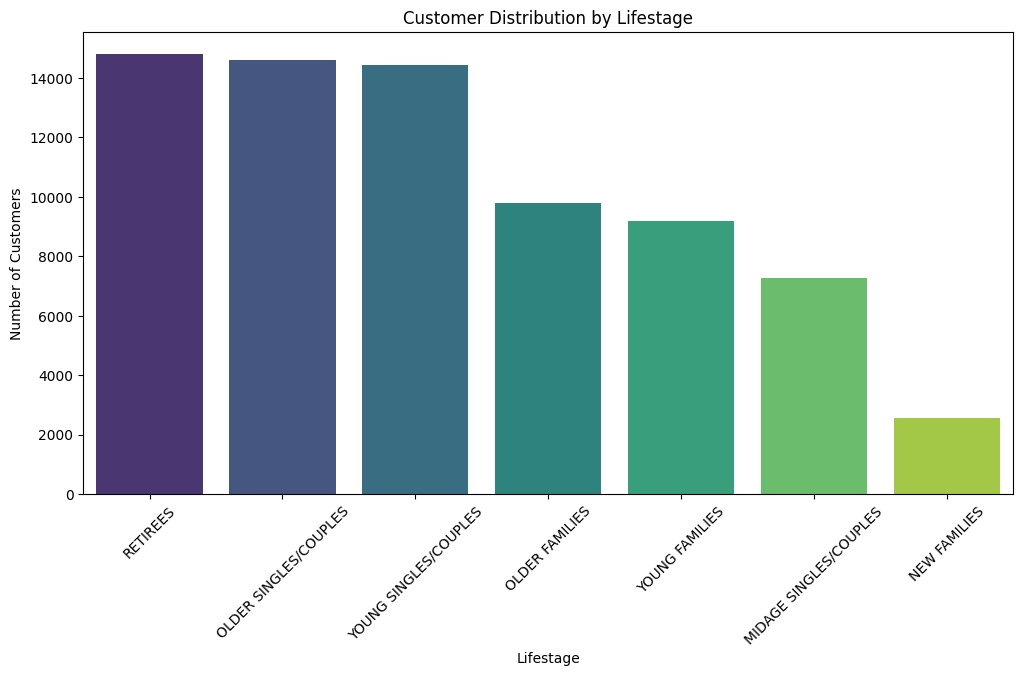

In [136]:
lifestage_counts = behav_data['LIFESTAGE'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Lifestage")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19636\2331334698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=premium_counts.index, y=premium_counts.values, palette='coolwarm')
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

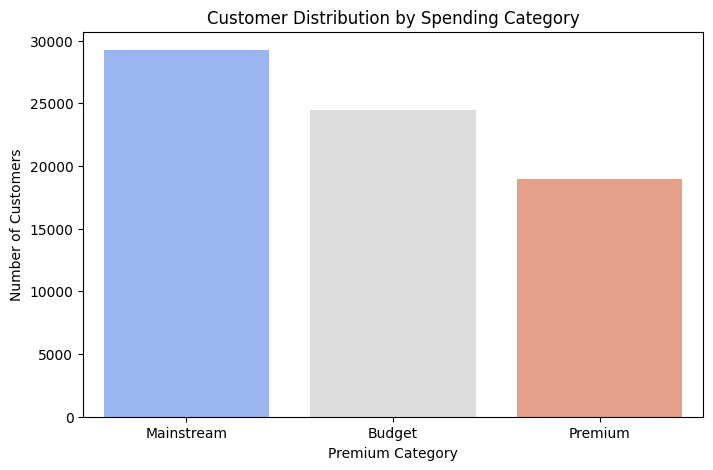

In [137]:
premium_counts = behav_data['PREMIUM_CUSTOMER'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=premium_counts.index, y=premium_counts.values, palette='coolwarm')
plt.xlabel("Premium Category")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Spending Category")
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

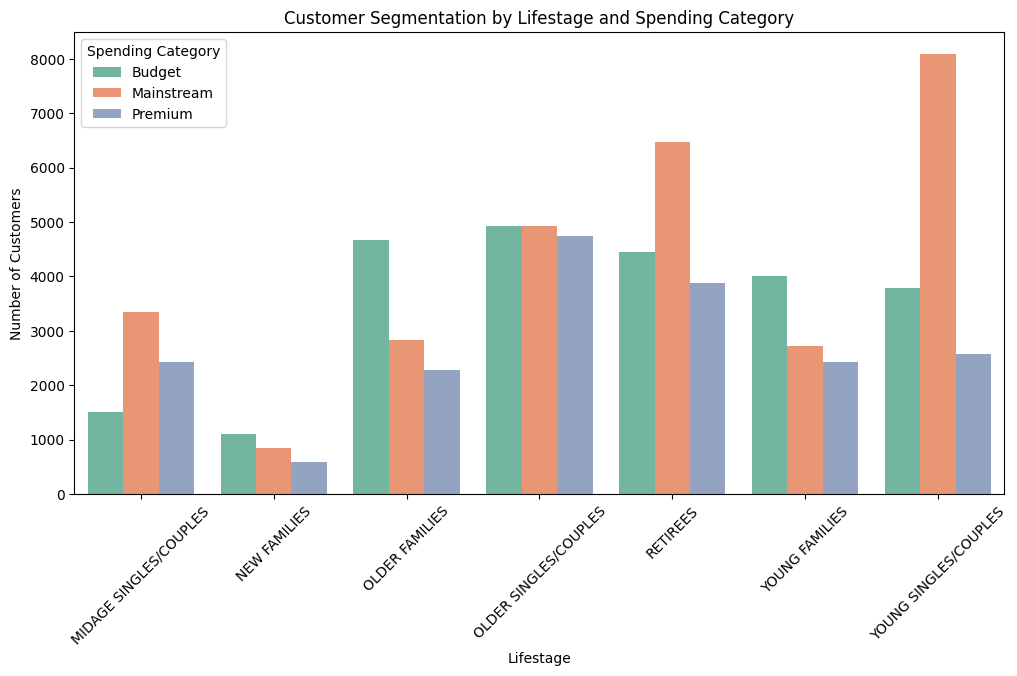

In [138]:
segment_counts = behav_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='count', hue='PREMIUM_CUSTOMER', data=segment_counts, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation by Lifestage and Spending Category")
plt.legend(title="Spending Category")
plt.show()

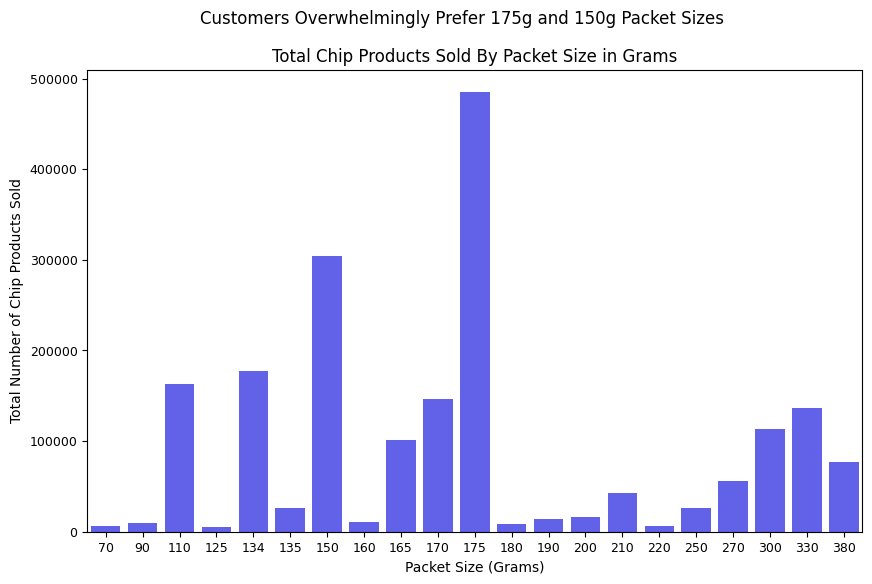

In [139]:
packet_size_sales = df_merged.groupby('Packet Size')['TOT_SALES'].sum().reset_index(name='Total Sales')
plt.figure(figsize=(10, 6))
sns.barplot(x='Packet Size', y='Total Sales', data=packet_size_sales, color='blue', alpha=0.7)
plt.xlabel("Packet Size (Grams)")
plt.ylabel("Total Number of Chip Products Sold")
plt.title("Total Chip Products Sold By Packet Size in Grams")
plt.xticks(size=9)
plt.yticks(size=9)
plt.suptitle("Customers Overwhelmingly Prefer 175g and 150g Packet Sizes")
plt.show()


In [140]:
# Group by product name and sum the total sales
top_selling_products = df_merged.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort the products by total sales in descending order
top_selling_products = top_selling_products.sort_values(by='TOT_SALES', ascending=False)

# Select the top 3 best-selling products
top_3_products = top_selling_products.head(3)

# Display the top 3 best-selling products
print(top_3_products)


                                   PROD_NAME  TOT_SALES
11              Dorito Corn Chp Supreme 380g   40348.75
86     Smiths Crnkle Chip Orgnl Big Bag 380g   36367.60
76  Smiths Crinkle Chips Salt & Vinegar 330g   34804.20


In [141]:
# Group by product name and sum the total sales
top_selling_products = df_merged.groupby('brand_name')['TOT_SALES'].sum().reset_index()

# Sort the products by total sales in descending order
top_selling_products = top_selling_products.sort_values(by='TOT_SALES', ascending=False)

# Select the top 3 best-selling products
top_3_products = top_selling_products.head(3)

# Display the top 3 best-selling products
print(top_3_products)


   brand_name  TOT_SALES
12     Kettle   390230.6
20     Smiths   210076.8
6     Doritos   201538.9


C:\Users\USER\AppData\Local\Temp\ipykernel_19636\3969919356.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PROD_NAME', y='TOT_SALES', data=top_selling_products, palette='Blues_d')
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get

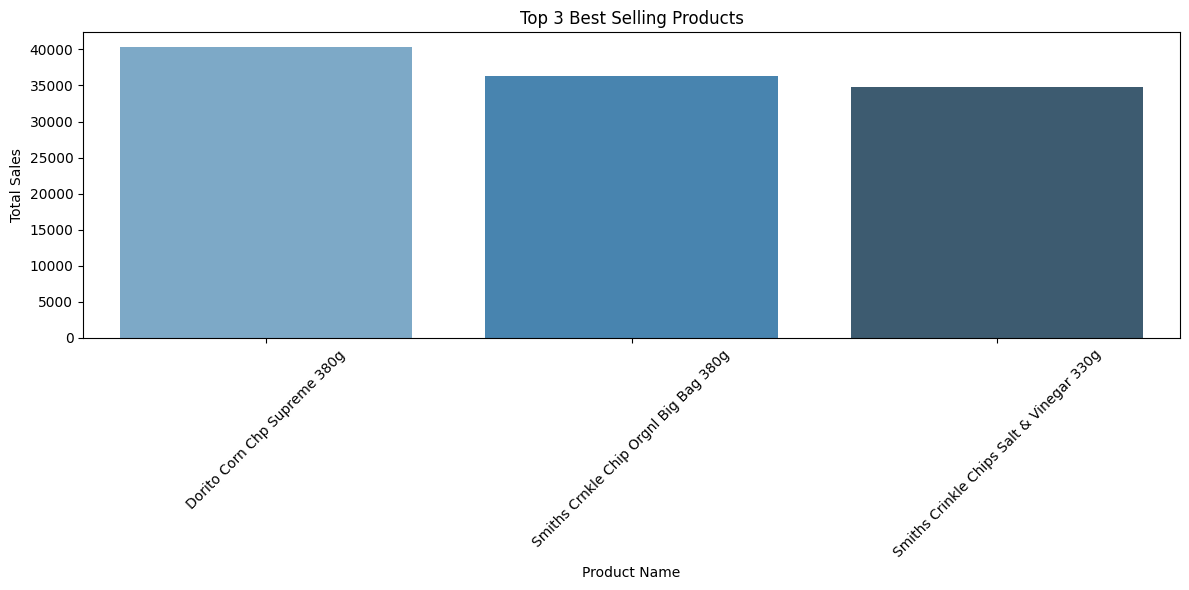

In [142]:
# Group by product name and sum the total sales
top_selling_products = df_merged.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort the products by total sales in descending order and get the top 3
top_selling_products = top_selling_products.sort_values(by='TOT_SALES', ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='PROD_NAME', y='TOT_SALES', data=top_selling_products, palette='Blues_d')

# Add labels and title
plt.xticks(rotation=45)
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 3 Best Selling Products')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_19636\1415666811.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand_name', y='TOT_SALES', data=top_selling_products, palette='Blues_d')
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.ge

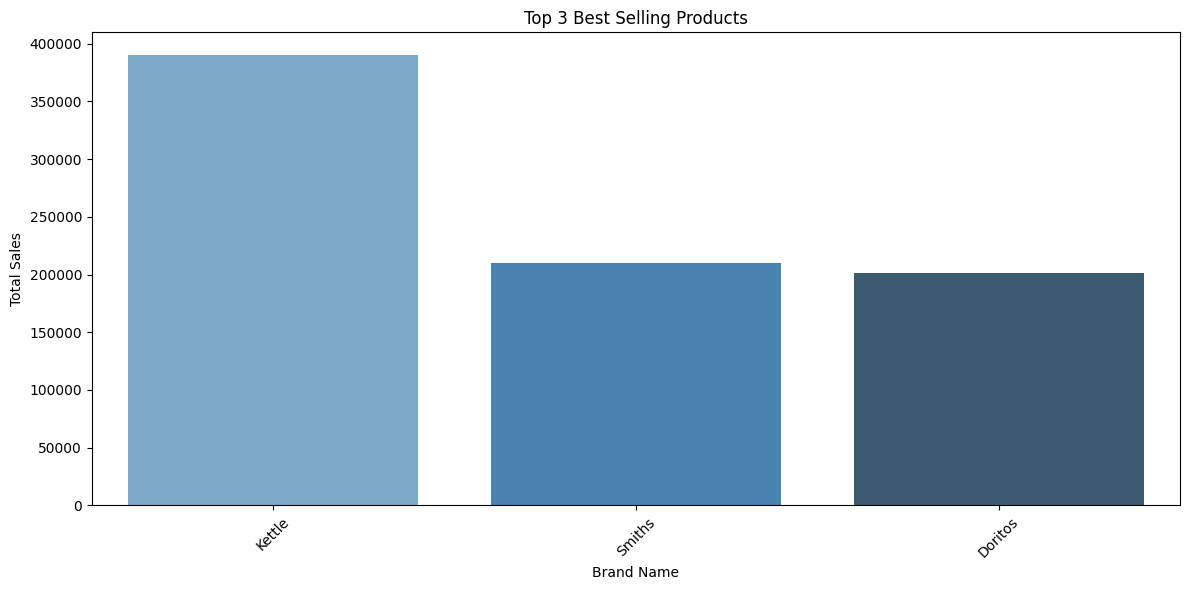

In [143]:
# Group by product name and sum the total sales
top_selling_products = df_merged.groupby('brand_name')['TOT_SALES'].sum().reset_index()

# Sort the products by total sales in descending order and get the top 3
top_selling_products = top_selling_products.sort_values(by='TOT_SALES', ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='TOT_SALES', data=top_selling_products, palette='Blues_d')

# Add labels and title
plt.xticks(rotation=45)
plt.xlabel('Brand Name')
plt.ylabel('Total Sales')
plt.title('Top 3 Best Selling Products')

# Show the plot
plt.tight_layout()
plt.show()


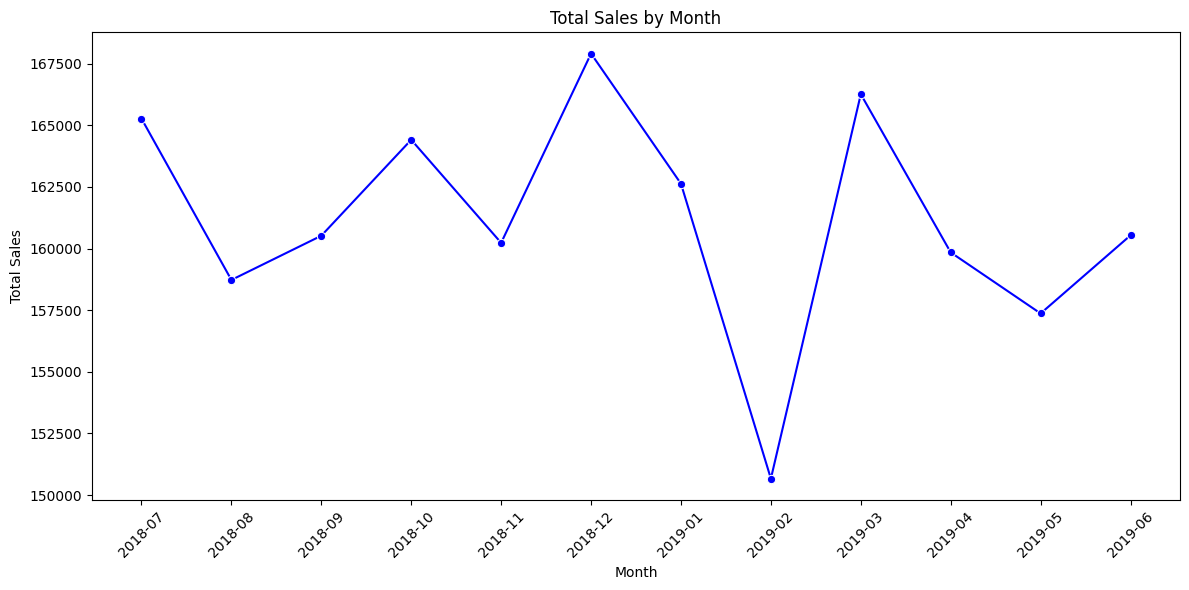

In [144]:

# Extract the Year-Month from the DATE column
df_merged['Year_Month'] = df_merged['DATE'].dt.to_period('M').astype(str)

# Group by the Year-Month and sum the TOT_SALES
sales_by_month = df_merged.groupby('Year_Month')['TOT_SALES'].sum().reset_index()

# Create a line plot to visualize total sales by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='TOT_SALES', data=sales_by_month, marker='o', color='b')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Show the plot
plt.tight_layout()
plt.show()


In [145]:
# Group by PROD_NAME and sum the total sales to get the top 10 products
top_10_products = df_merged.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort and select the top 10 products
top_10_products = top_10_products.sort_values(by='TOT_SALES', ascending=False).head(3)

# Filter the main dataset to keep only the top 10 products
filtered_df = df_merged[df_merged['PROD_NAME'].isin(top_10_products['PROD_NAME'])]

# Group by LIFESTAGE and PROD_NAME, then sum the total sales
top_selling_lifestage_product = filtered_df.groupby(['LIFESTAGE', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

pd.DataFrame(top_selling_lifestage_product)

,LIFESTAGE,PROD_NAME,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,3646.50
1,MIDAGE SINGLES/COUPLES,Smiths Crinkle Chips Salt & Vinegar 330g,3351.60
2,MIDAGE SINGLES/COUPLES,Smiths Crnkle Chip Orgnl Big Bag 380g,3746.50
3,NEW FAMILIES,Dorito Corn Chp Supreme 380g,1088.75
4,NEW FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,758.10
5,NEW FAMILIES,Smiths Crnkle Chip Orgnl Big Bag 380g,1008.90
6,OLDER FAMILIES,Dorito Corn Chp Supreme 380g,7982.00
7,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,6549.30
8,OLDER FAMILIES,Smiths Crnkle Chip Orgnl Big Bag 380g,6165.50
9,OLDER SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,8456.50


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

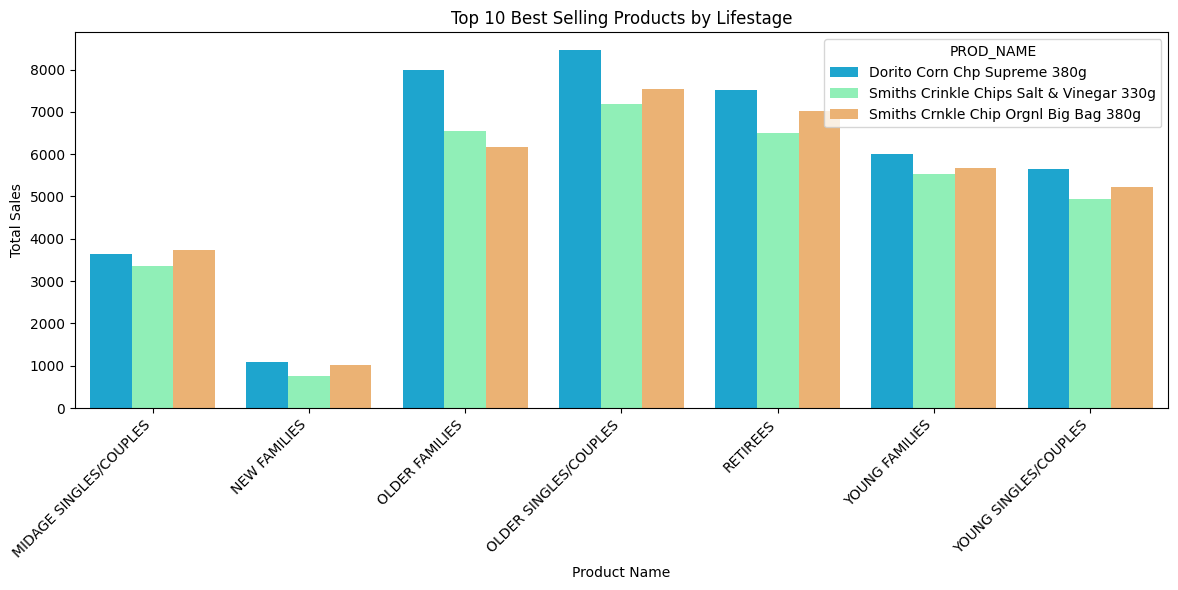

In [146]:
# Group by PROD_NAME and sum the total sales to get the top 10 products
top_10_products = df_merged.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort and select the top 10 products
top_10_products = top_10_products.sort_values(by='TOT_SALES', ascending=False).head(3)

# Filter the main dataset to keep only the top 10 products
filtered_df = df_merged[df_merged['PROD_NAME'].isin(top_10_products['PROD_NAME'])]

# Group by LIFESTAGE and PROD_NAME, then sum the total sales
top_selling_lifestage_product = filtered_df.groupby(['LIFESTAGE', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

# Create a bar plot with the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PROD_NAME', data=top_selling_lifestage_product, palette='rainbow')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Best Selling Products by Lifestage')

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

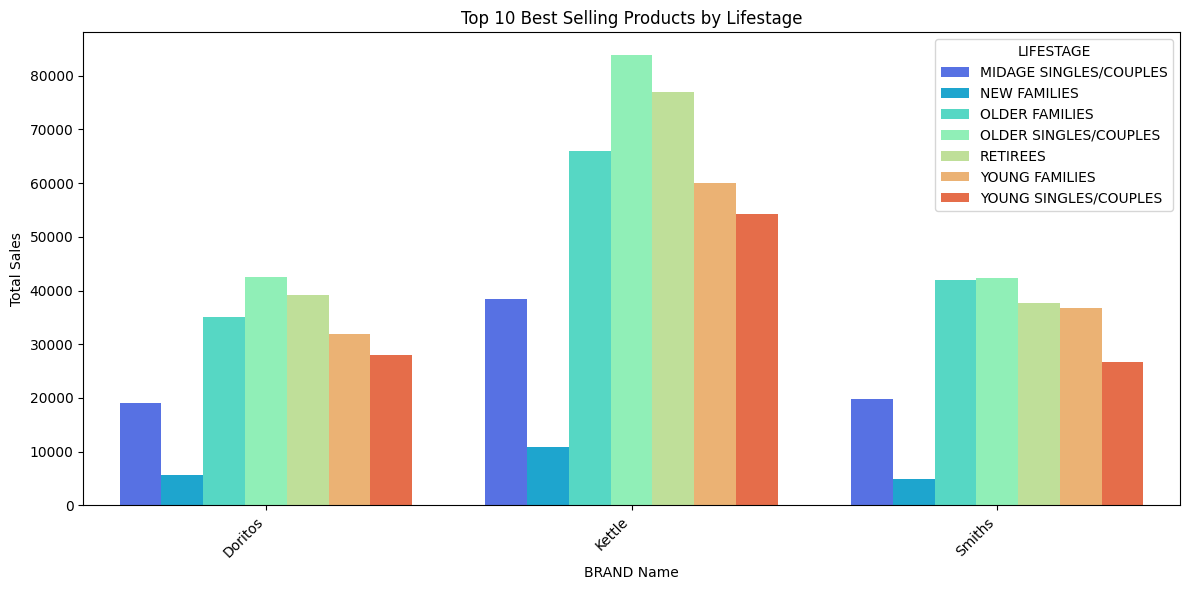

In [147]:
# Group by PROD_NAME and sum the total sales to get the top 10 products
top_10_products = df_merged.groupby('brand_name')['TOT_SALES'].sum().reset_index()

# Sort and select the top 10 products
top_10_products = top_10_products.sort_values(by='TOT_SALES', ascending=False).head(3)

# Filter the main dataset to keep only the top 10 products
filtered_df = df_merged[df_merged['brand_name'].isin(top_10_products['brand_name'])]

# Group by LIFESTAGE and PROD_NAME, then sum the total sales
top_selling_lifestage_product = filtered_df.groupby(['LIFESTAGE', 'brand_name'])['TOT_SALES'].sum().reset_index()

# Create a bar plot with the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='TOT_SALES', hue='LIFESTAGE', data=top_selling_lifestage_product, palette='rainbow')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('BRAND Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Best Selling Products by Lifestage')

# Show the plot
plt.tight_layout()
plt.show()

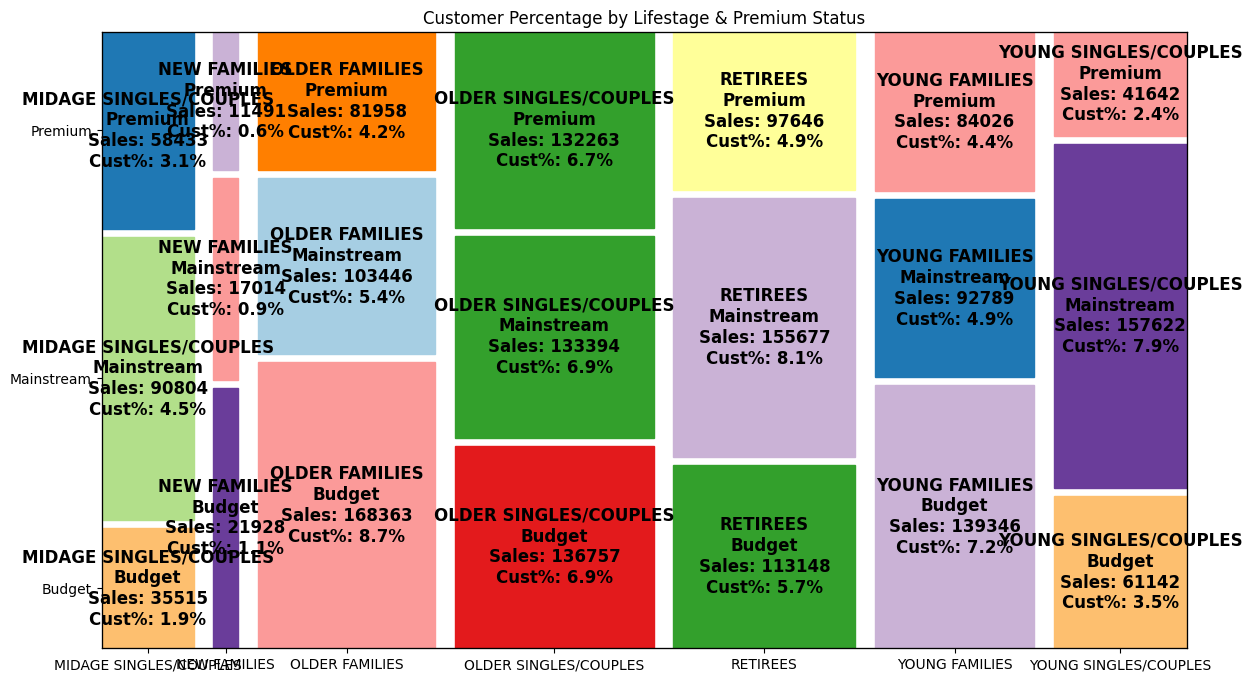

In [148]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import numpy as np

# Step 1: Count customers in each segment
customer_counts = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size()

# Step 2: Convert to percentage
customer_percentage = customer_counts / customer_counts.sum()

# Step 3: Prepare Total Sales Data
total_sales = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# Step 4: Create a DataFrame combining Sales & Customer Percentage
mosaic_data = pd.DataFrame({'Total_Sales': total_sales, 'Customer_Percentage': customer_percentage})

# Step 5: Define Labels for Plot (Showing Both Sales and Customer %)
mosaic_labels = {key: f"{key[0]}\n{key[1]}\nSales: {value['Total_Sales']:.0f}\nCust%: {value['Customer_Percentage']:.1%}" 
                 for key, value in mosaic_data.iterrows()}

# Step 6: Create the Mosaic Plot
fig, ax = plt.subplots(figsize=(14, 8))  # Increased figure size for readability
props = lambda key: {'color': plt.cm.Paired(np.random.rand())}  # Random distinct colors for contrast

# Generate the mosaic plot with better label formatting
mosaic(customer_percentage, 
       title="Customer Percentage by Lifestage & Premium Status", 
       labelizer=lambda k: mosaic_labels[k], 
       gap=0.02,  # Reduced gap for better alignment
       properties=props, 
       ax=ax)

# Increase font size for readability
for text in ax.texts:
    text.set_fontsize(12)  # Adjust label size
    text.set_fontweight('bold')  # Make text bold for clarity

plt.show()
